In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as np
import model
import plot
import params
import fenton_karma as fk

In [3]:
field_size = (20, 20)  # cm
dx = 0.01
dt = 0.01
diffusivity = 0.001

In [4]:
shape = fk.convert.realsize_to_shape(field_size, dx)

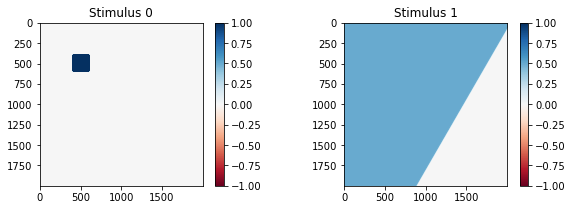

In [5]:
# stimuli
s1 = fk.stimulus.protocol(start=0, duration=2)
s1 = fk.stimulus.rectangular(shape, (500, 500), (200, 200), 5, protocol=s1)

s2 = fk.stimulus.protocol(start=fk.convert.ms_to_units(400, dt), duration=2)
s2 = fk.stimulus.triangular(shape, direction="up", angle=60, coverage=0.7, modulus=0.5, protocol=s2)

stimuli = [s1, s2]
fk.plot.show_stimuli(*stimuli)

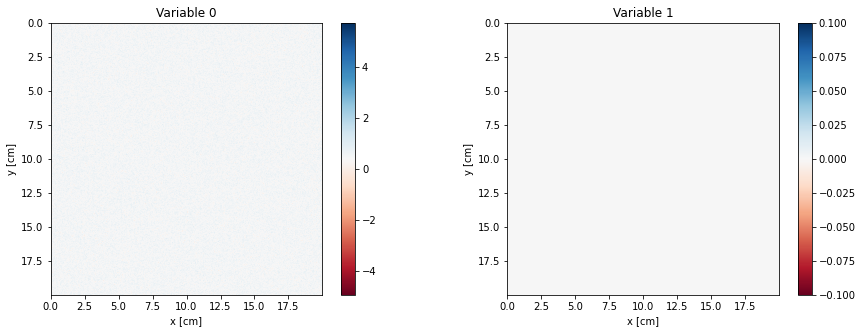

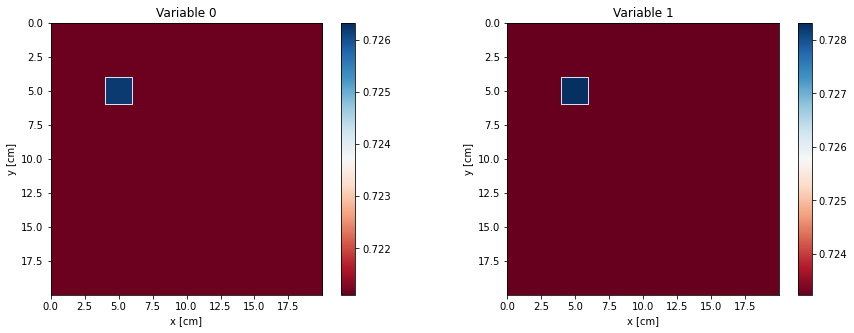

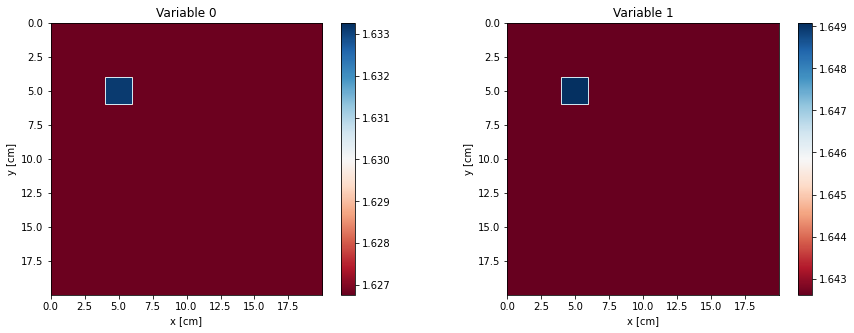

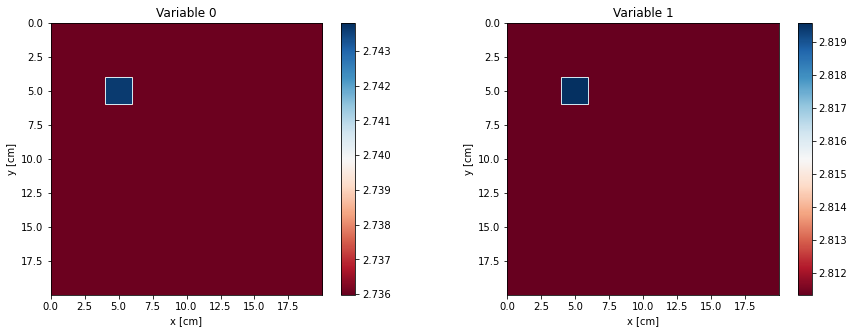

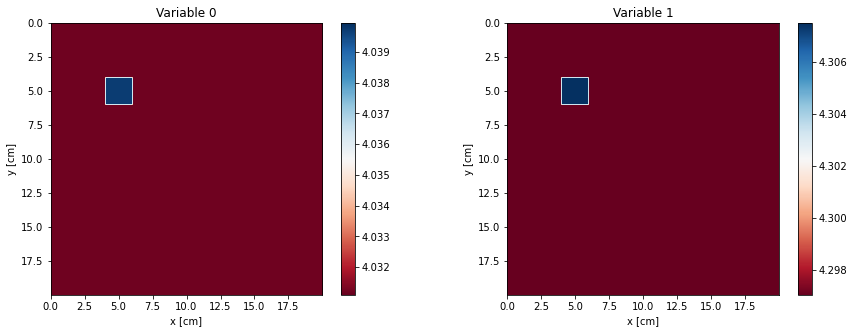

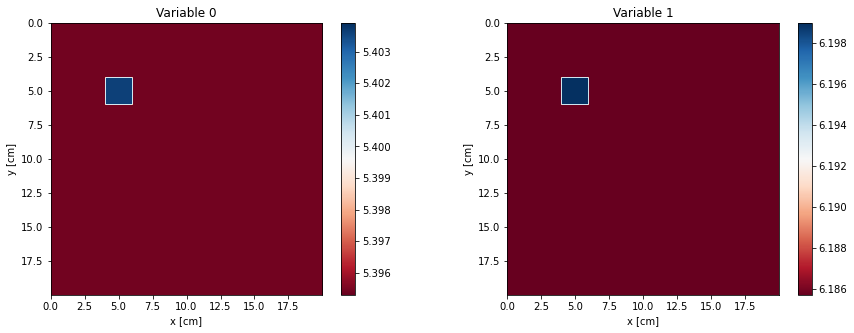

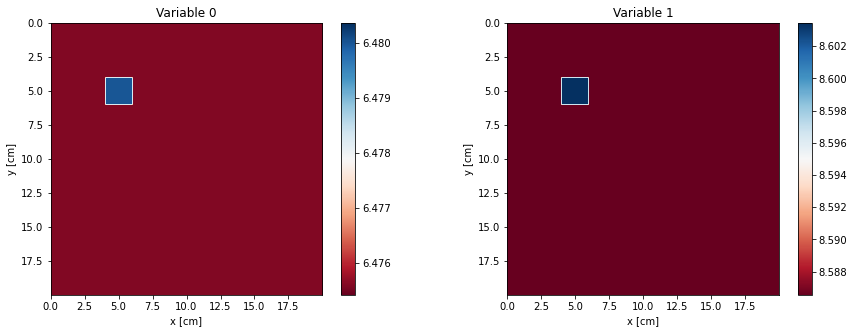

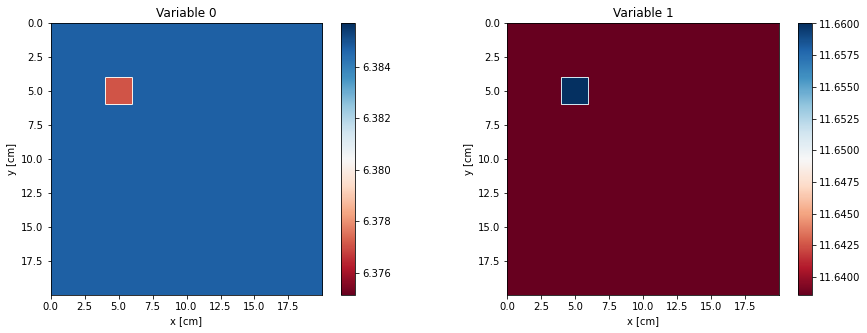

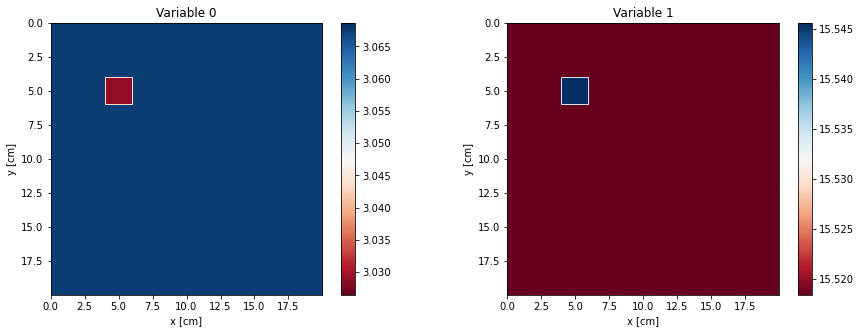

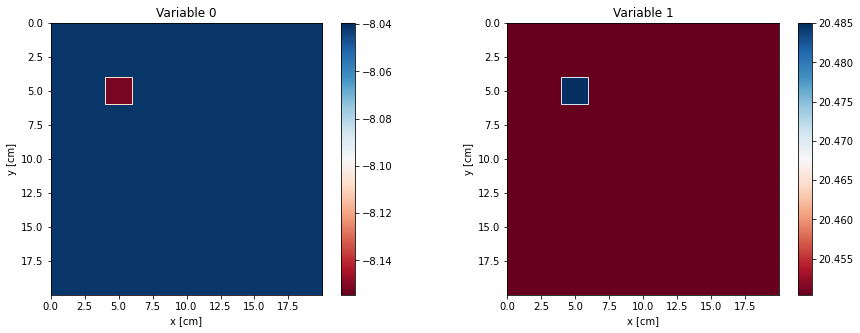

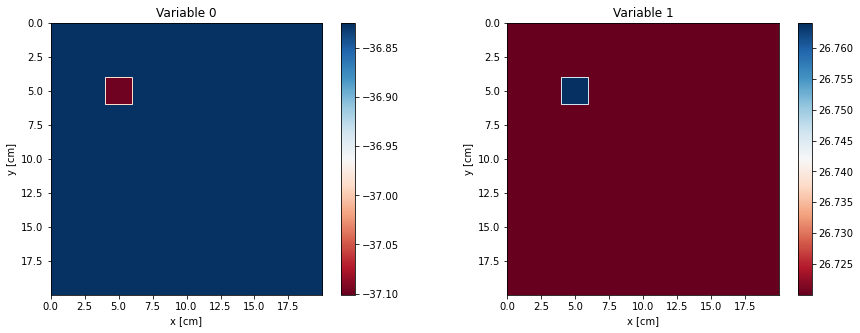

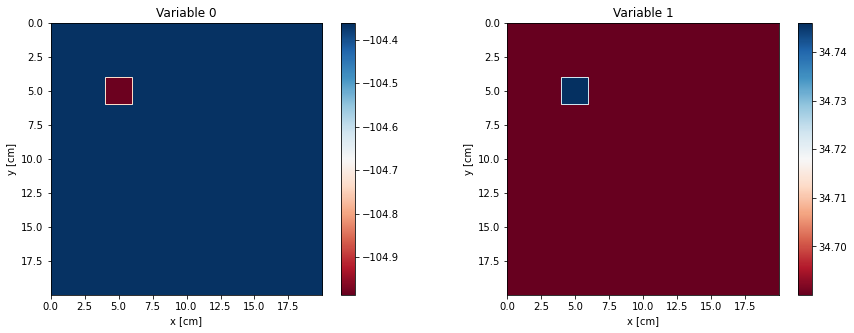

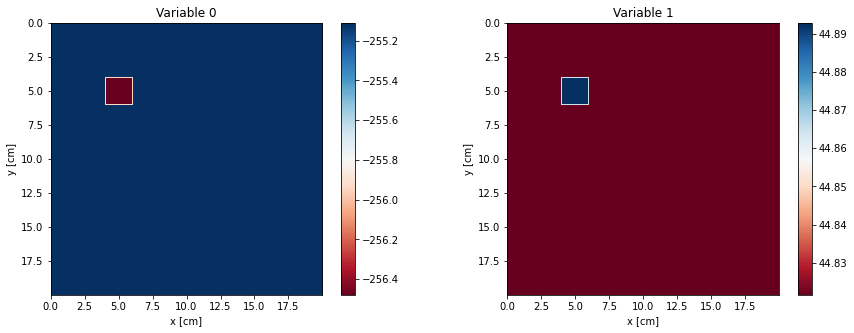

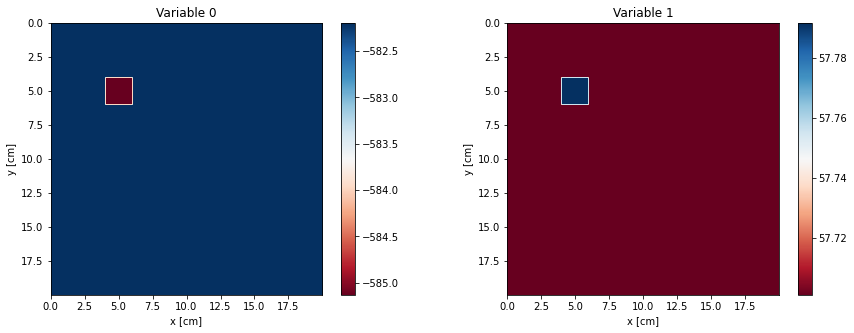

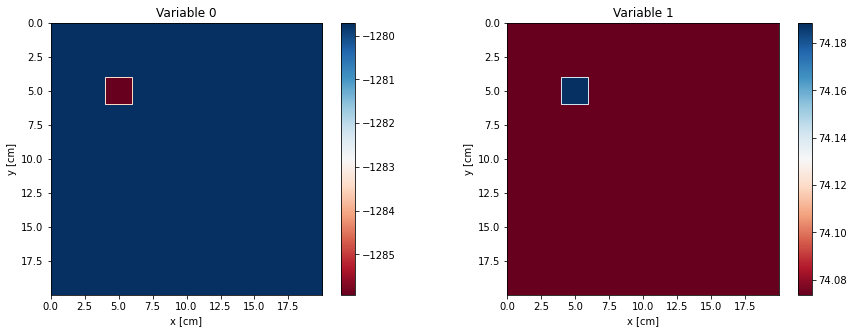

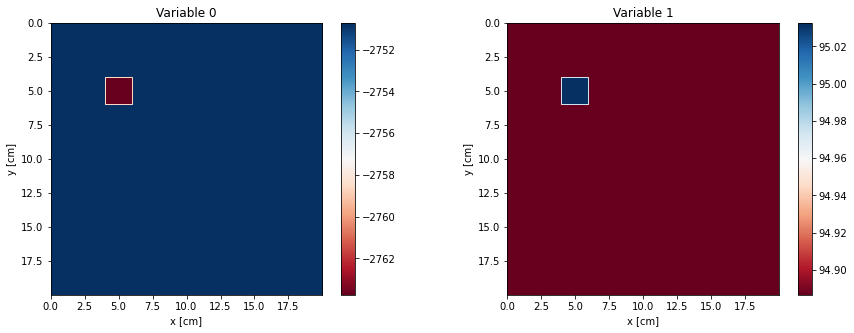

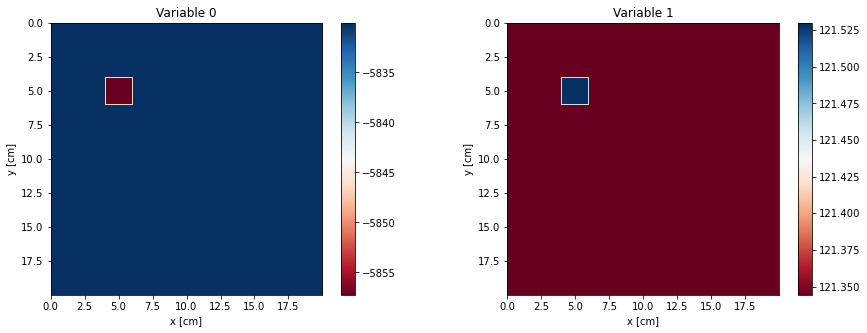

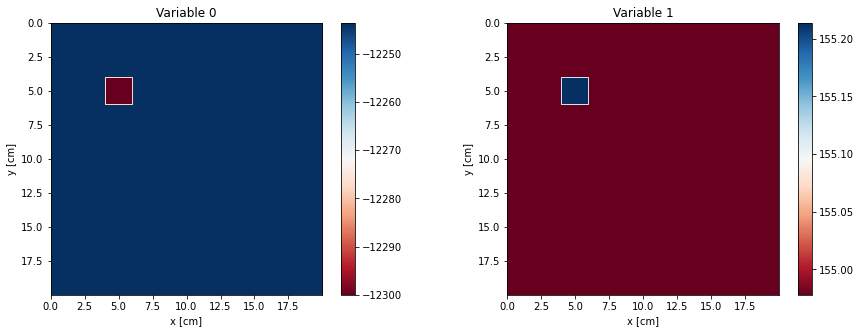

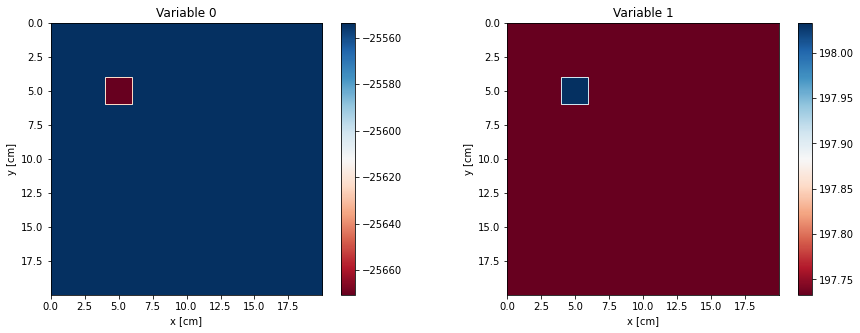

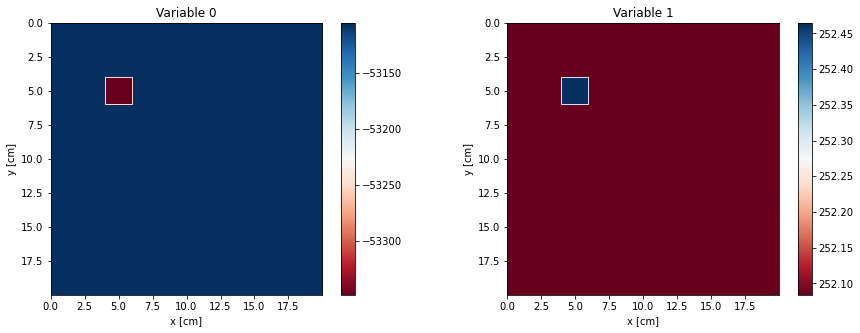

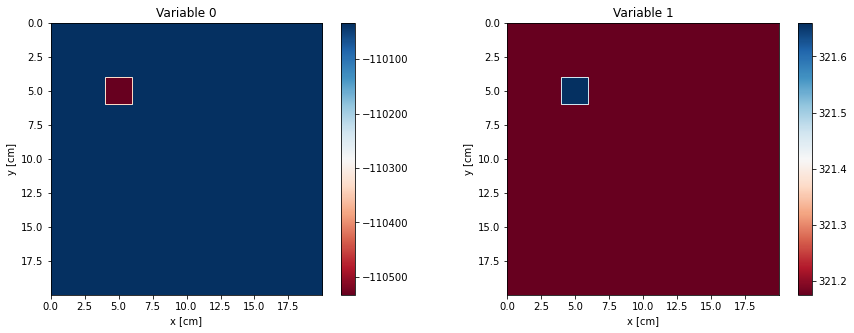

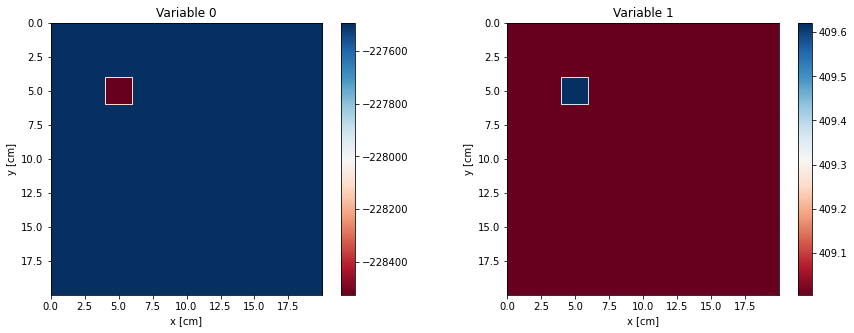

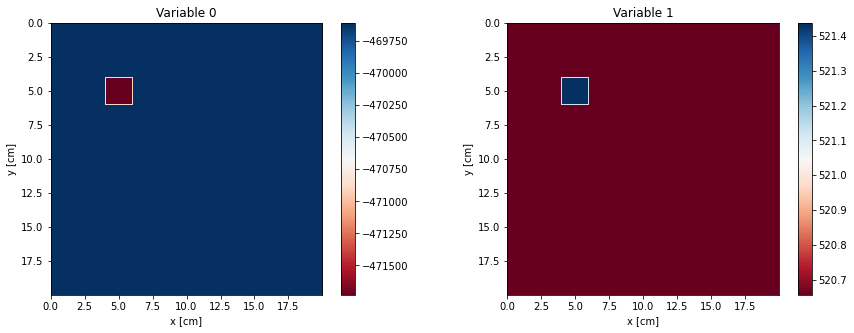

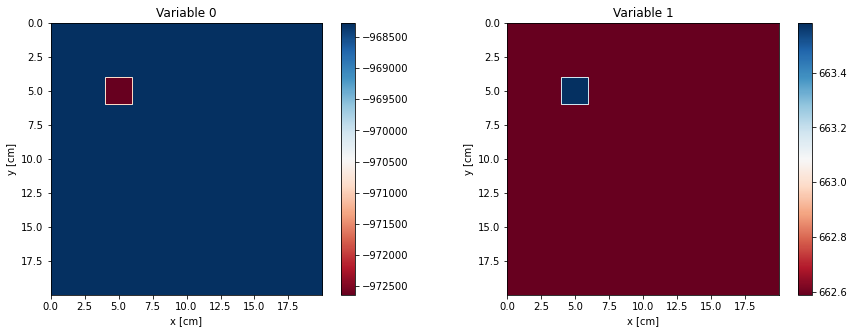

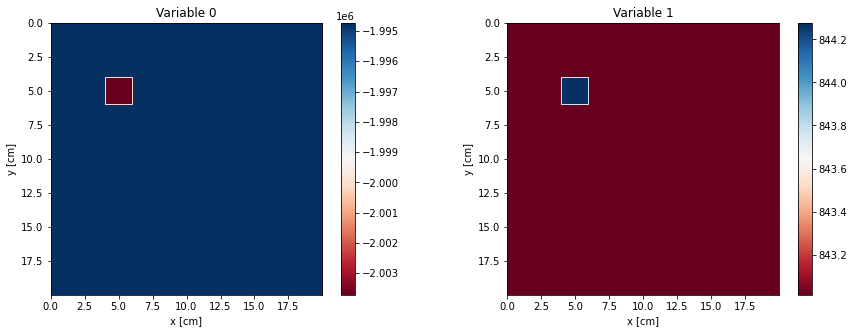

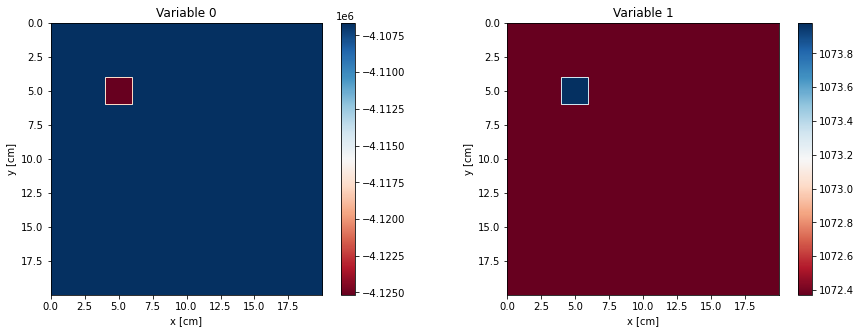

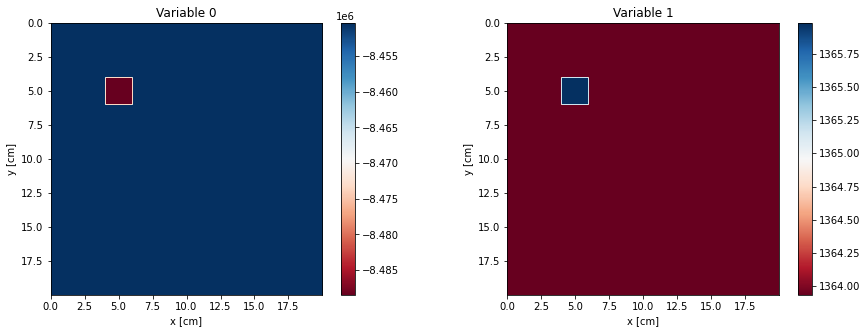

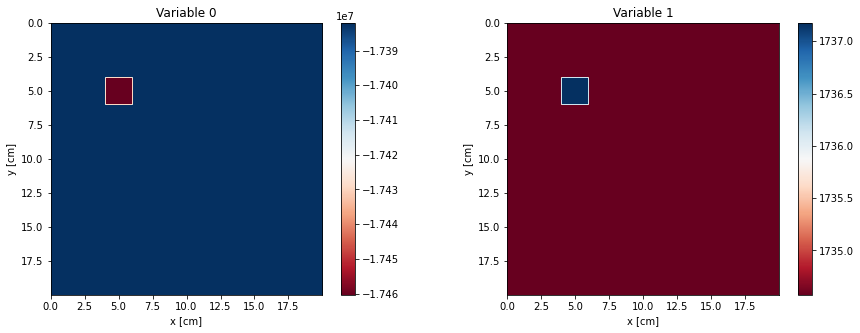

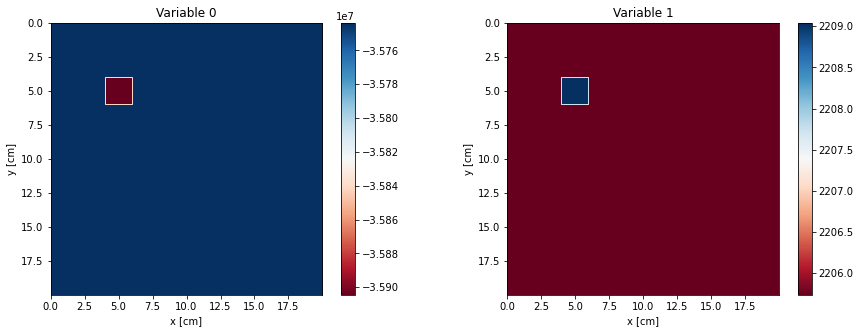

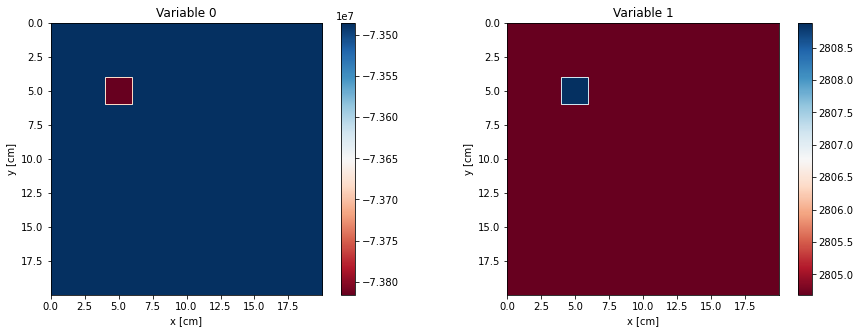

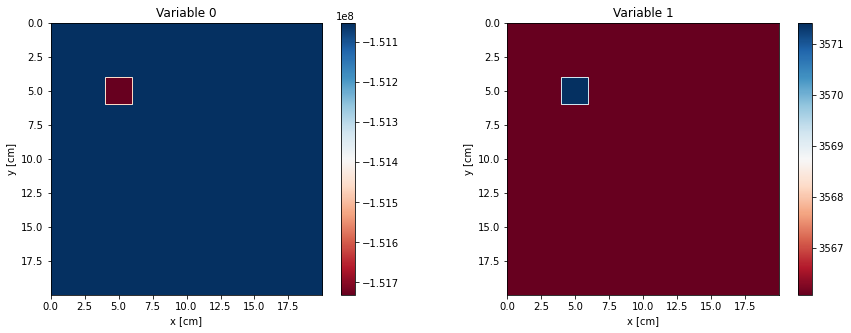

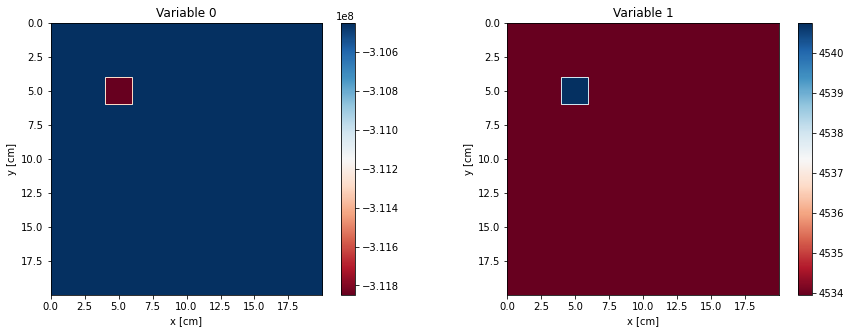

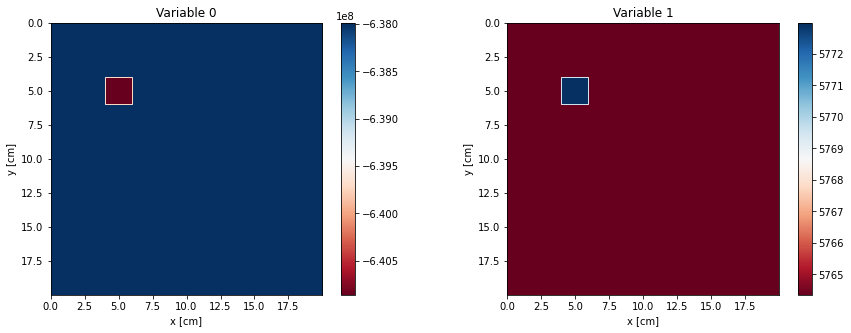

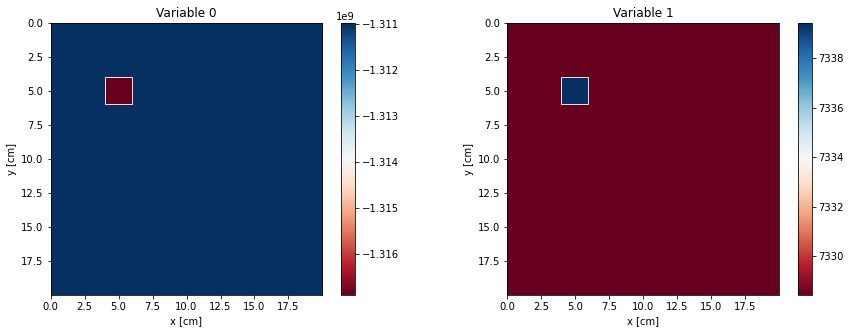

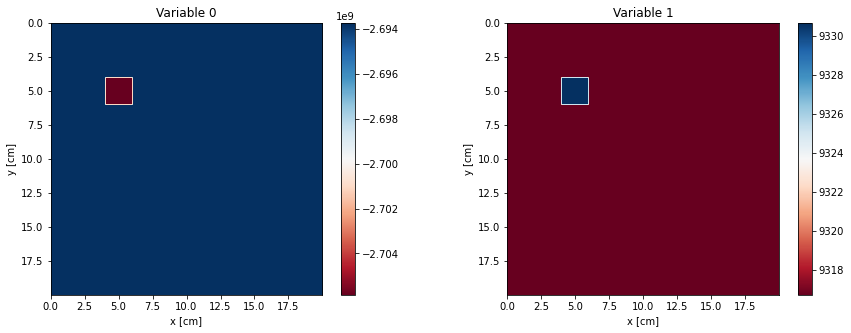

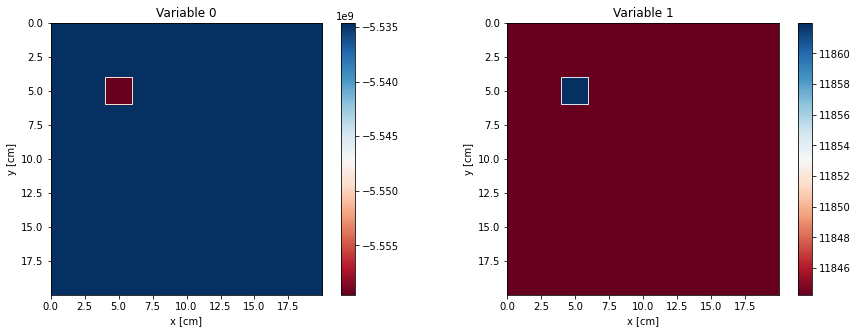

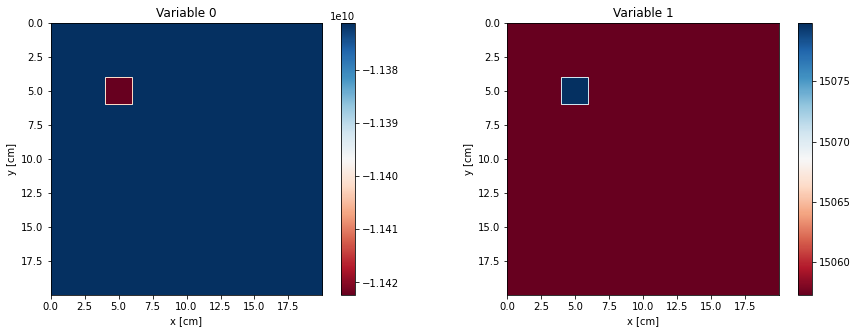

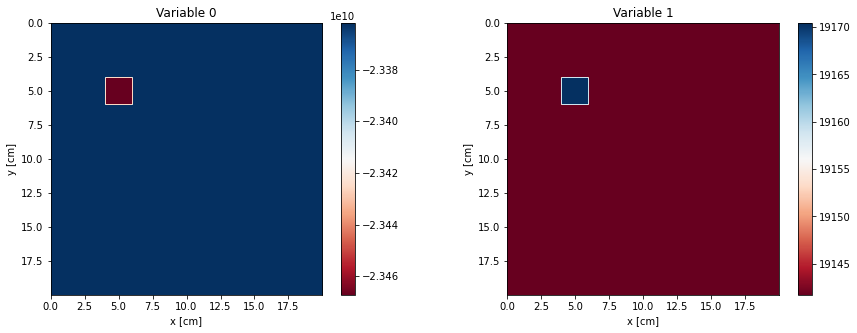

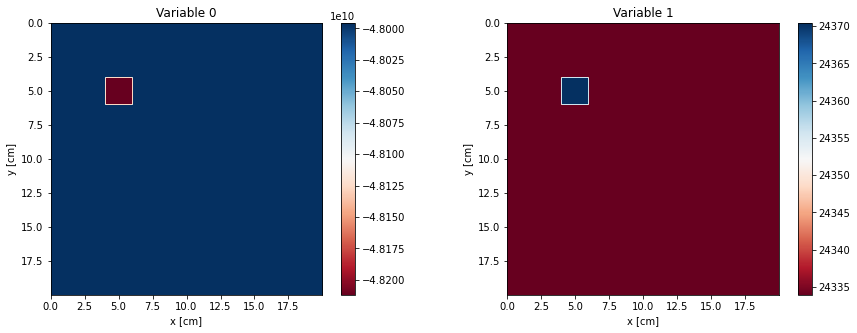

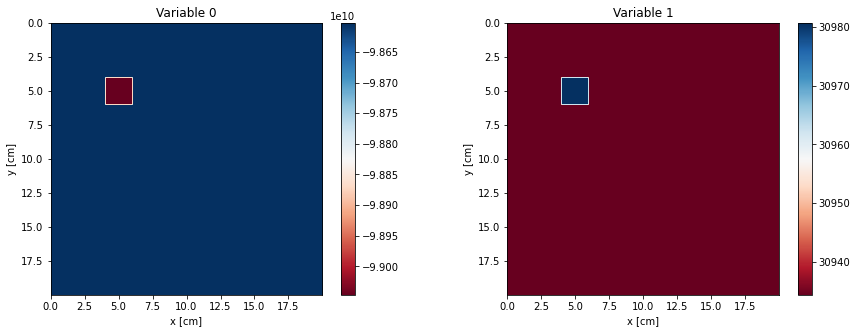

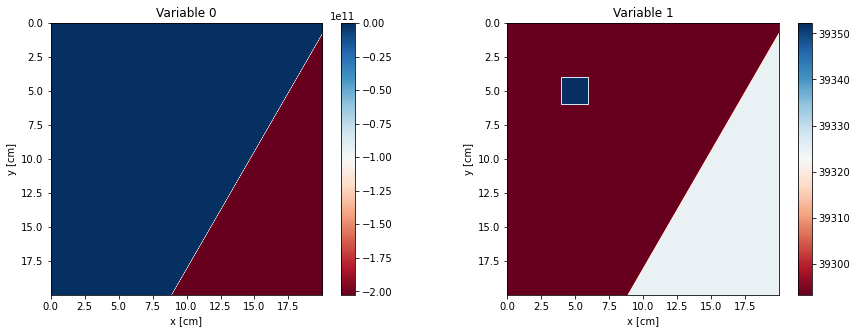

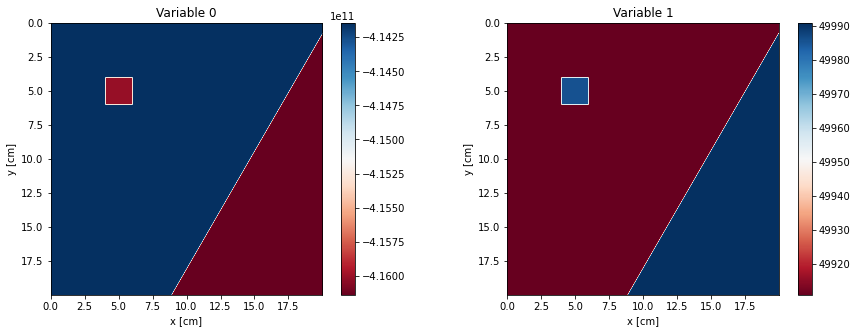

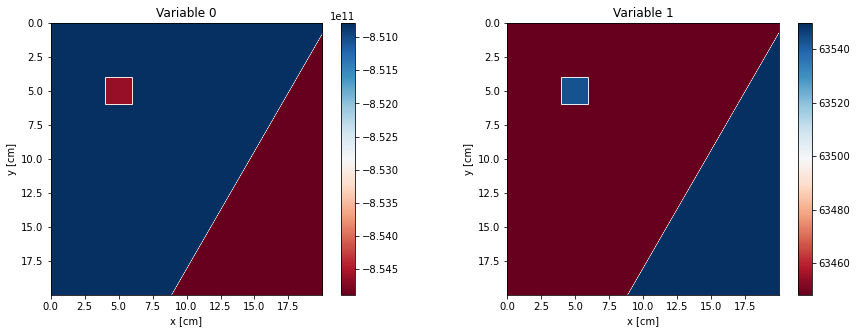

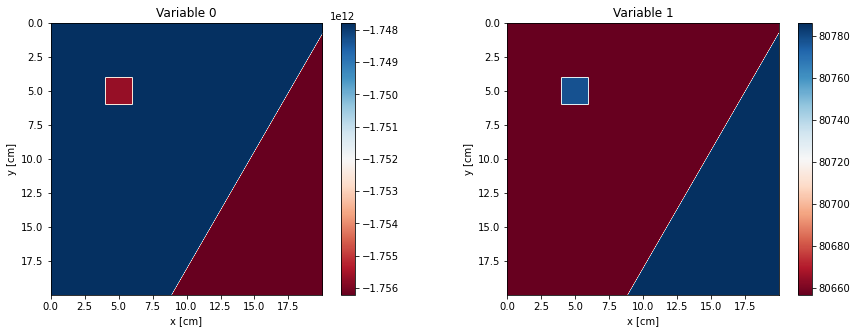

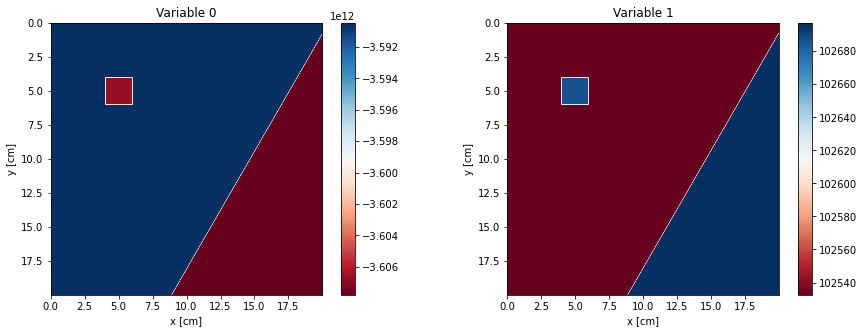

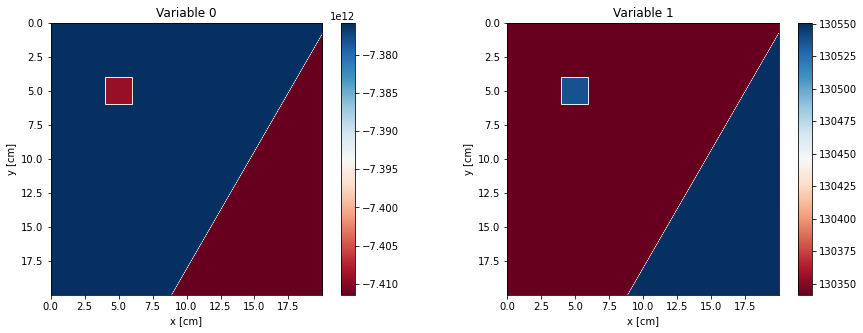

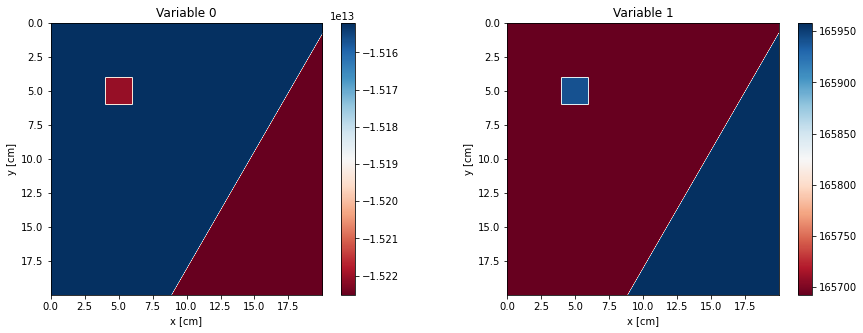

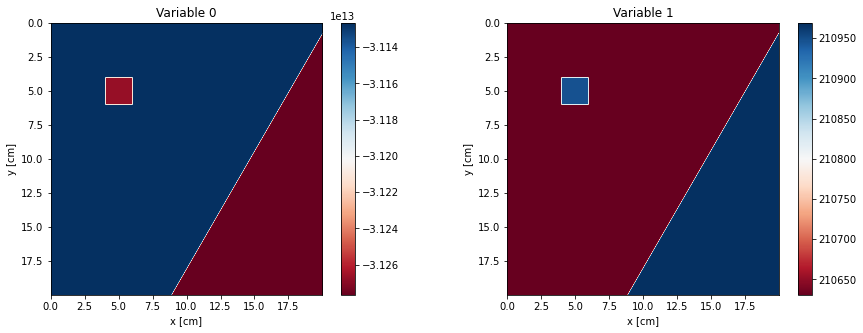

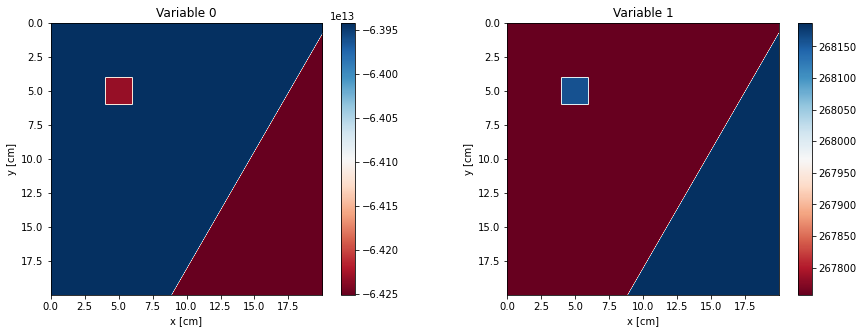

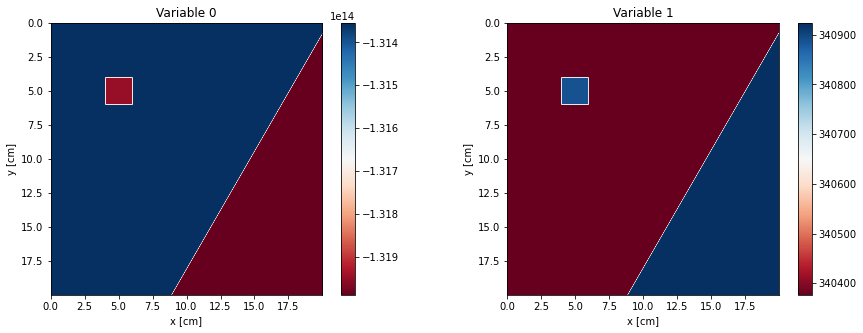

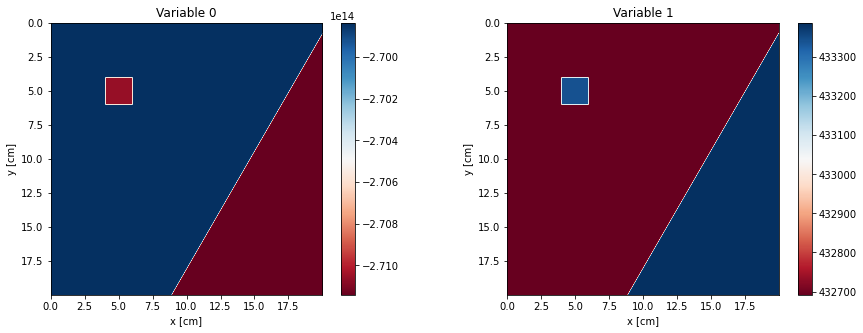

KeyboardInterrupt: 

In [6]:
states = model.forward(shape=shape, checkpoints=range(1, 20000000, 1000), diffusivity=diffusivity, params=params.Params(), stimuli=stimuli, dt=dt, dx=dx)